In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Чтение данных из CSV файла
data = pd.read_csv('rfm_analysis_data.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Предобработка данных

In [3]:
#Проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
# Преобразование колонки 'InvoiceDate' в формат даты
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["InvoiceDate"] = data["InvoiceDate"].dt.date
data.head()
data.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [5]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
# Удаление строк с отрицательными значениями количества
data = data[data['Quantity'] > 0]

# Удаление строк с отрицательными значениями цены
data = data[data['Price'] > 0]

# Проверка на наличие пропусков в данных
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236122
Country             0
dtype: int64

In [7]:
data[data['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09,10.79,NaN,United Kingdom


In [8]:
# Удаление строк, где отсутствует 'Customer ID'
data.dropna(subset=['Customer ID'], how='all', inplace=True)
data.isnull().sum()
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


### Проводим RFM-анализ

In [9]:
# Считаем крайний день заказа
diff_days = data["InvoiceDate"].max()

# Считаем выручку по каждому клиенту для расчета monetary
data['revenue'] = data['Quantity'] * data['Price']

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


In [10]:
# Сводим данные для RFM-анализа с группировкой по ID клиента
rfm = (data
         .groupby('Customer ID', as_index=False)
         .agg(recency=('InvoiceDate', 'max'),
              frequency=('Invoice', 'nunique'),
              monetary=('revenue', 'sum')
             )
        )

# Преобразовывеаем recency в разницу между крайним днем всех заказов и последним днем заказа клиента
rfm['recency'] = (diff_days - rfm['recency']).dt.days
rfm.head()

,Customer ID,recency,frequency,monetary
0,12346.0,325,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,310,1,334.40


In [15]:
# Присвоение квантилей для RFM метрик
rfm['R_Score'] = pd.qcut(rfm['recency'], 3, labels=[3, 2, 1])  # Чем меньше давность, тем выше балл
rfm['F_Score'] = pd.qcut(rfm['frequency'], 3, labels=[1, 2, 3])  # Чем больше частота, тем выше балл
rfm['M_Score'] = pd.qcut(rfm['monetary'], 3, labels=[1, 2, 3])   # Чем больше сумма покупок, тем выше балл
rfm.head()

,Customer ID,recency,frequency,monetary,R_Score,F_Score,M_Score
0,12346.0,325,12,77556.46,1,3,3
1,12347.0,2,8,5633.32,3,3,3
2,12348.0,75,5,2019.40,2,2,3
3,12349.0,18,4,4428.69,3,2,3
4,12350.0,310,1,334.40,1,1,1


In [22]:
# Объединение RFM баллов в один общий балл
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head()

,Customer ID,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Group
0,12346.0,325,12,77556.46,1,3,3,133,Ранее активные
1,12347.0,2,8,5633.32,3,3,3,333,VIP клиенты (3-3-3)
2,12348.0,75,5,2019.40,2,2,3,223,Засыпающие
3,12349.0,18,4,4428.69,3,2,3,323,Регулярные клиенты
4,12350.0,310,1,334.40,1,1,1,111,Заснвушие


In [24]:
#Присваеваем статусы клиентам
def classify_rfm(rfm_score):
    r, f, m = map(int, list(rfm_score))
    
    if r == 3 and f == 3 and m == 3:
        return 'VIP клиенты'
    elif r == 3 and f == 1:
        return 'Новички'
    elif r == 2 and f <= 2:
        return 'Засыпающие'
    elif r == 1 and f == 3:
        return "Ранее активные"
    elif r == 1 and f <= 2:
        return 'Заснвушие'
    else:
        return 'Регулярные клиенты'

rfm['RFM_Group'] = rfm['RFM_Score'].apply(classify_rfm)
rfm.head()

,Customer ID,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Group
0,12346.0,325,12,77556.46,1,3,3,133,Ранее активные
1,12347.0,2,8,5633.32,3,3,3,333,VIP клиенты
2,12348.0,75,5,2019.40,2,2,3,223,Засыпающие
3,12349.0,18,4,4428.69,3,2,3,323,Регулярные клиенты
4,12350.0,310,1,334.40,1,1,1,111,Заснвушие


### Визуализируем данные

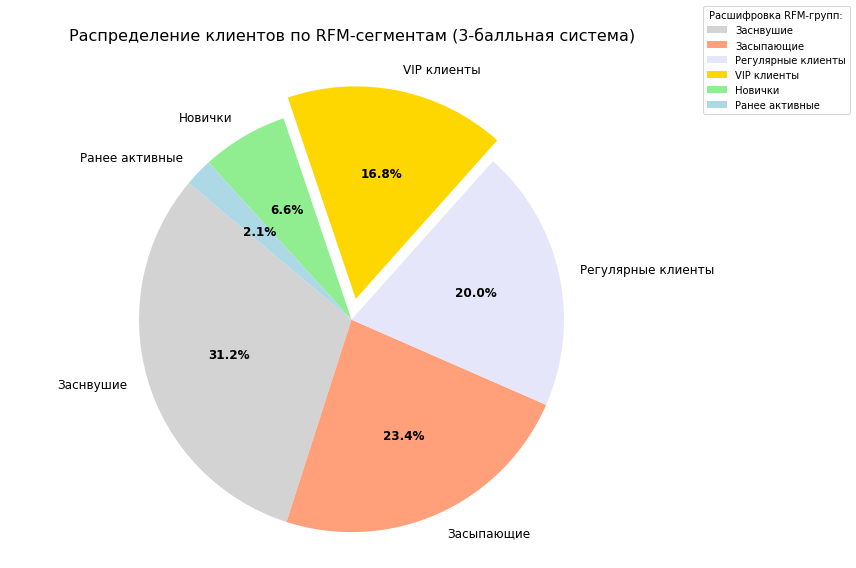

In [27]:
# Считаем количество клиентов в каждой группе
group_counts = rfm['RFM_Group'].value_counts()

# Настройка цветов для каждого сегмента
colors = {
    'VIP клиенты': '#FFD700',  # золотой
    'Новички': '#90EE90',    # светло-зеленый
    'Засыпающие': '#FFA07A',        # светло-коралловый
    "Ранее активные": '#ADD8E6',      # светло-голубой
    'Заснвушие': '#D3D3D3',      # светло-серый
    'Регулярные клиенты': '#E6E6FA'       # лавандовый
}

# Создаем диаграмму
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[colors[g] for g in group_counts.index],
    explode=[0.1 if 'VIP' in g else 0 for g in group_counts.index],
    textprops={'fontsize': 12}
)

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

plt.title('Распределение клиентов по RFM-сегментам (3-балльная система)', pad=20, fontsize=16)
plt.axis('equal')

# Добавляем таблицу с расшифровкой RFM-кодов
plt.legend(
    title="Расшифровка RFM-групп:",
    loc="center left",
    bbox_to_anchor=(1, 1),
    fontsize=10
)

plt.tight_layout()
plt.show()